<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/%5BIGTI%5D_BTC_PYT_Aula_Interativa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula Interativa 2**

- Bootcamp IGTI
  - Desenvolvedor Python
  - Módulo 2: Análise de dados
- [Prof. Matheus Mendonça](https://www.linkedin.com/in/matheusmendonca/)

## **Análise de tendências de locações de bicicletas**

### **Descrição do problema**

O uso de bicicletas como um meio de transporte ganhou muita força nos últimos anos, seja por questões ambientais, de saúde ou até mesmo infraestrutura de trânsito. Para incentivar o uso de bicicletas, cidades em todo o mundo têm implementado programas de compartilhamento de bicicleta. Nesses sistemas, as bicicletas são retiradas e devolvidas em quiosques automatizados espalhados em diversos pontos da cidade.

As plataformas de compartilhamento de bicicletas costumam coletar diversos tipos de dados, entre eles: duração da viagem, localização inicial e final do percurso, entre outros. Esses dados coletados pela plataforma, em conjunto com informações sobre o clima, trânsito e relevo, por exemplo, torna possível uma análise mais robusta de compartilhamento de bicicletas.

A seguir, um descritivo dos dados coletados:

- rec_id: índice do registro;
- datetime : data
- season : estação do ano (1: inverno, 2: primevera, 3: verão, 4: outono);
- year : ano (0: 2011, 1:2012);
- month : mês (1 a 12);
- hour : hora do dia (0 a 23)
- is_holiday : booleano indicando feriado;
- weekday : dia da semana (0: domingo, ..., 6: sábado);
- is_workingday : booleano indicando dia útil;
- weather_condition: (1: limpo, 2: nublado, 3: chuva leve, 4: chuva forte);
- temp : Temperatura escalada entre 0 e 1. Valor original em graus Celsius: -8 a 39;
- atemp: Sensação térmica escalada entre 0 e 1. Valor original em graus Celsius: -16 a 50;
- humidity: Humidade relativa (0 a 1)
- windspeed: Velocidade do vento escalada entre 0 e 1 (máximo original: 67).
- casual: usuários casuais;
- registered: usuários registrados;
- total_count: contador total de alugueis (casual+registered).


### **Análise exploratória**

In [ ]:
# carregandos as bibliotecas básicas
import numpy as np
import pandas as pd

# bibliotecas para plots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)

#### Leitura dos dados

In [ ]:
# leitura do dataset
df = pd.read_csv("https://pycourse.s3.amazonaws.com/bike-sharing.csv")
df.head()

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# info básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17379 non-null  object 
 1   rec_id             17379 non-null  int64  
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

#### Pré-processamento

In [ ]:
# date time conversion
df['datetime'] = pd.to_datetime(df['datetime'])

# categorical variables
df['season'] = df['season'].astype('int')
df['is_holiday'] = df['is_holiday'].astype('int')
df['weekday'] = df['weekday'].astype('int')
df['weather_condition'] = df['weather_condition'].astype('int')
df['is_workingday'] = df['is_workingday'].astype('int')
df['month'] = df['month'].astype('int')
df['year'] = df['year'].astype('int')
df['hour'] = df['hour'].astype('int')

#### Visualizações

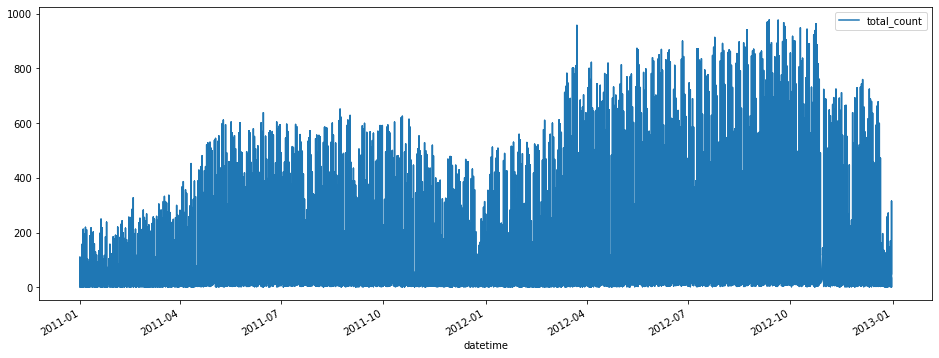

In [ ]:
# plot inicial
df.plot(x='datetime', y='total_count');

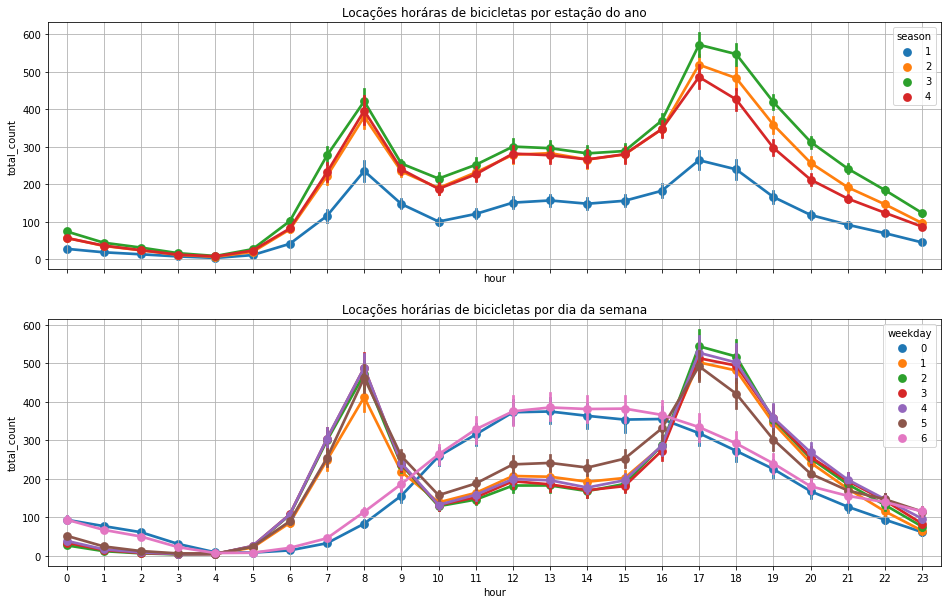

In [ ]:
# tendências horárias
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))

sns.pointplot(data=df, x='hour', y='total_count', hue='season', ax=ax[0])
ax[0].set_title("Locações horáras de bicicletas por estação do ano")
ax[0].grid()

sns.pointplot(data=df, x='hour', y='total_count', hue='weekday', ax=ax[1])
ax[1].set_title("Locações horárias de bicicletas por dia da semana")
ax[1].grid();

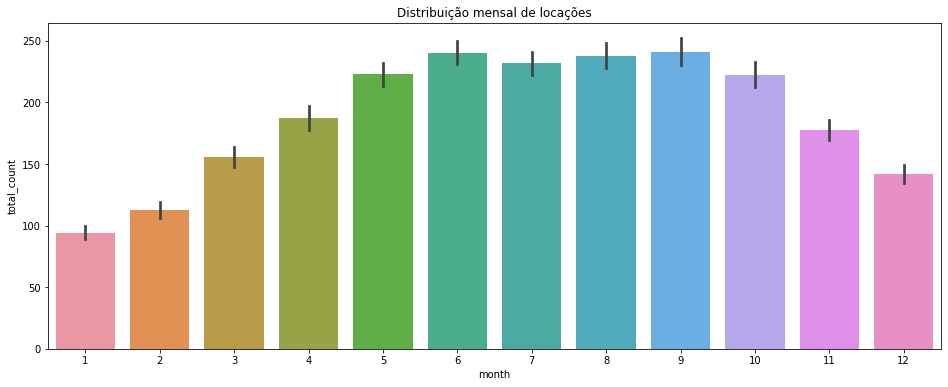

In [ ]:
# distribuição por mês
fig, ax = plt.subplots()
sns.barplot(data=df, x="month", y="total_count")
ax.set_title("Distribuição mensal de locações");

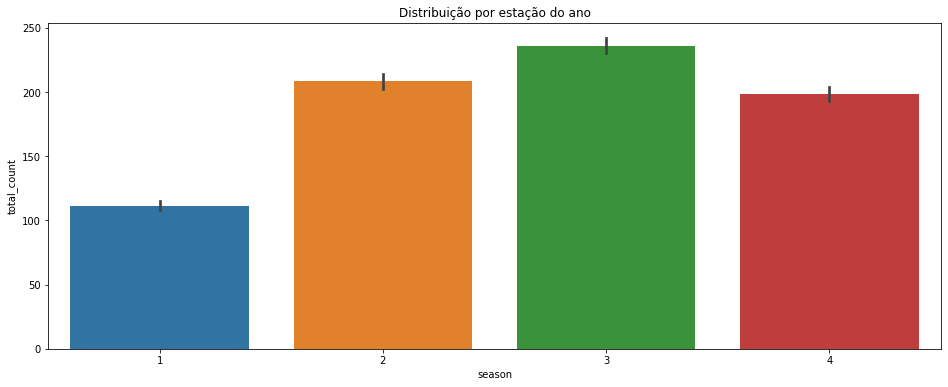

In [ ]:
# distribuição por estação do ano
fig, ax = plt.subplots()
sns.barplot(data=df, x="season", y="total_count")
ax.set_title("Distribuição por estação do ano");

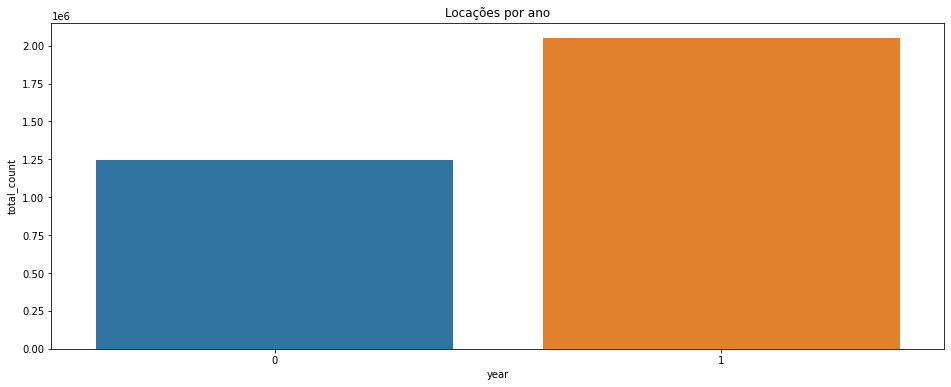

In [ ]:
# distribuição por ano
fig, ax = plt.subplots()
sns.barplot(data=df, x="year", y="total_count", estimator=sum, ci=None)
ax.set_title("Locações por ano");

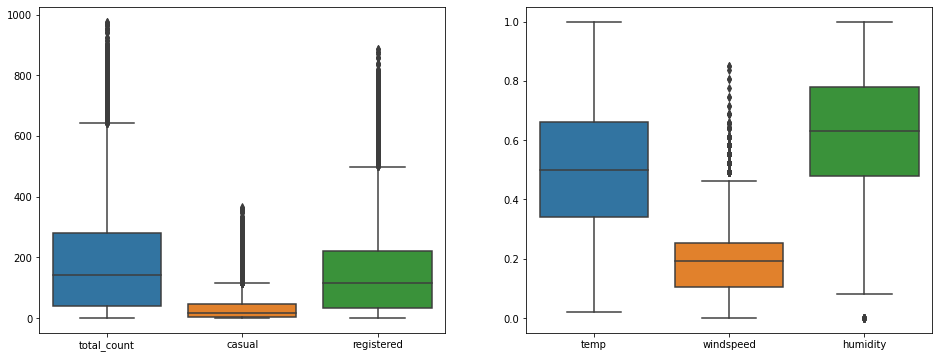

In [ ]:
# outliers
fig, ax = plt.subplots(ncols=2)
sns.boxplot(data=df[['total_count', 'casual', 'registered']], ax=ax[0])
sns.boxplot(data=df[['temp', 'windspeed', 'humidity']], ax=ax[1]);

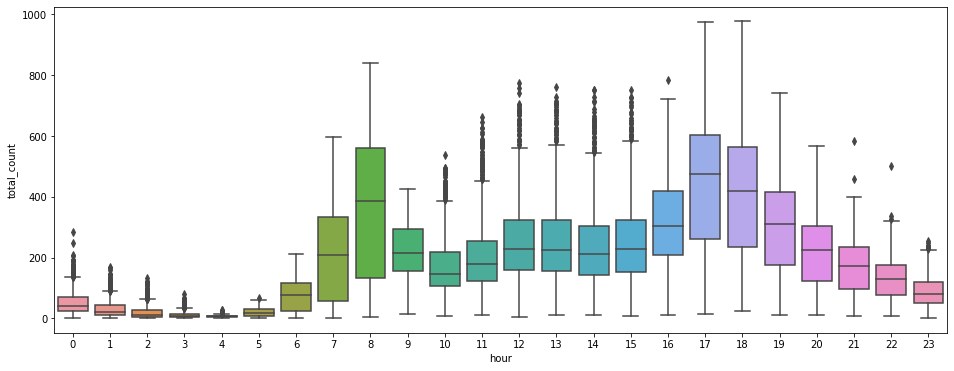

In [ ]:
# outliers: uso horário
fig, ax = plt.subplots()
sns.boxplot(data=df, x="hour", y="total_count");

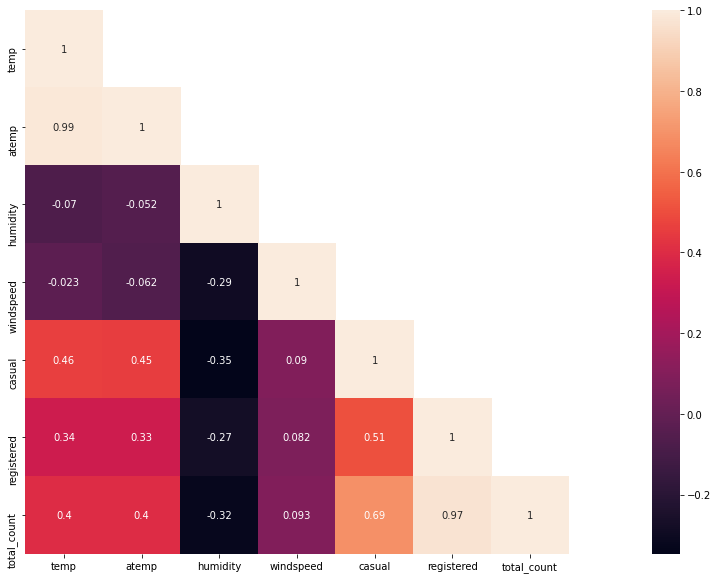

In [ ]:
# correlação
plt.figure(figsize=(30,10))

# extraindo matrix de correlação
corr_mat = df[['temp', 'atemp', 'humidity', 'windspeed',
              'casual', 'registered', 'total_count']].corr()

# visualização dos elementos abaixo da diagonal principal
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False

# plot
sns.heatmap(corr_mat, mask=mask, square=True, annot=True)
plt.show()

### **Modelo preditivo de locações**

Nesta seção será feita uma **modelagem simplificada** do problema de previsão de demanda diária do uso de bicicletas.

#### Pré-processamento

In [ ]:
# pré-processamento dos dados: remoção de colunas desnecessárias
df.drop(['rec_id',
         'casual',
         'registered',
         'atemp',
         'year',
         'hour'],
        axis=1,
        inplace=True)

In [ ]:
# visualização das primeiras linhas
df.head()

,datetime,season,month,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,windspeed,total_count
0,2011-01-01,1,1,0,6,0,1,0.24,0.81,0.0,16
1,2011-01-01,1,1,0,6,0,1,0.22,0.80,0.0,40
2,2011-01-01,1,1,0,6,0,1,0.22,0.80,0.0,32
3,2011-01-01,1,1,0,6,0,1,0.24,0.75,0.0,13
4,2011-01-01,1,1,0,6,0,1,0.24,0.75,0.0,1


In [ ]:
# agrupando pelo datetime
df = df.groupby('datetime', as_index=False).mean()

In [ ]:
# com os dados agrupados
df.head()

,datetime,season,month,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,windspeed,total_count
0,2011-01-01,1.0,1.0,0.0,6.0,0.0,1.583333,0.344167,0.805833,0.160446,41.041667
1,2011-01-02,1.0,1.0,0.0,0.0,0.0,1.956522,0.363478,0.696087,0.248539,34.826087
2,2011-01-03,1.0,1.0,0.0,1.0,1.0,1.000000,0.196364,0.437273,0.248309,61.318182
3,2011-01-04,1.0,1.0,0.0,2.0,1.0,1.043478,0.200000,0.590435,0.160296,67.913043
4,2011-01-05,1.0,1.0,0.0,3.0,1.0,1.000000,0.226957,0.436957,0.186900,69.565217


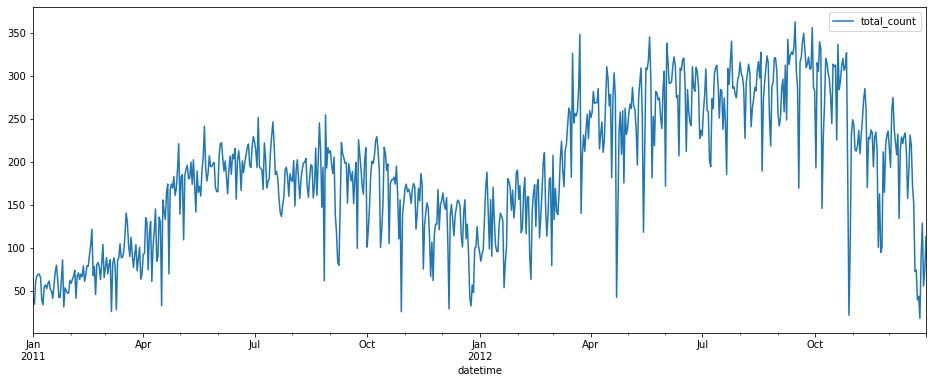

In [ ]:
# visualização dos dados agrupados
df.plot(x='datetime', y='total_count');

Como se trata de um modelo temporal, iremos utilizar o registro de `total_count` do dia anterior como uma variável exógena do nosso modelo.


In [ ]:
# gerando a série defasada total_count: lag1
df['total_count_lag1'] = np.r_[df.iloc[0, -1], df.iloc[:-1, -1]]

In [ ]:
# nova coluna
df.head(10)

,datetime,season,month,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,windspeed,total_count,total_count_lag1
0,2011-01-01,1.0,1.0,0.0,6.0,0.0,1.583333,0.344167,0.805833,0.160446,41.041667,41.041667
1,2011-01-02,1.0,1.0,0.0,0.0,0.0,1.956522,0.363478,0.696087,0.248539,34.826087,41.041667
2,2011-01-03,1.0,1.0,0.0,1.0,1.0,1.000000,0.196364,0.437273,0.248309,61.318182,34.826087
3,2011-01-04,1.0,1.0,0.0,2.0,1.0,1.043478,0.200000,0.590435,0.160296,67.913043,61.318182
4,2011-01-05,1.0,1.0,0.0,3.0,1.0,1.000000,0.226957,0.436957,0.186900,69.565217,67.913043
5,2011-01-06,1.0,1.0,0.0,4.0,1.0,1.347826,0.204348,0.518261,0.089565,69.826087,69.565217
6,2011-01-07,1.0,1.0,0.0,5.0,1.0,1.695652,0.196522,0.498696,0.168726,65.652174,69.826087
7,2011-01-08,1.0,1.0,0.0,6.0,0.0,1.708333,0.165000,0.535833,0.266804,39.958333,65.652174
8,2011-01-09,1.0,1.0,0.0,0.0,0.0,1.000000,0.138333,0.434167,0.361950,34.250000,39.958333
9,2011-01-10,1.0,1.0,0.0,1.0,1.0,1.333333,0.150833,0.482917,0.223267,55.041667,34.250000


In [ ]:
# ajustando os dtypes
df['season'] = df['season'].astype('int')
df['month'] = df['month'].astype('int')
df['is_holiday'] = df['is_holiday'].astype('int')
df['weekday'] = df['weekday'].astype('int')
df['is_workingday'] = df['is_workingday'].astype('int')

In [ ]:
# codificação das variáveis categóricas: one hot encoding
df = pd.get_dummies(df, columns=['season', 'month', 'weekday'])

In [ ]:
df.head()

,datetime,is_holiday,is_workingday,weather_condition,temp,humidity,windspeed,total_count,total_count_lag1,season_1,season_2,season_3,season_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01,0,0,1.583333,0.344167,0.805833,0.160446,41.041667,41.041667,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2011-01-02,0,0,1.956522,0.363478,0.696087,0.248539,34.826087,41.041667,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2011-01-03,0,1,1.000000,0.196364,0.437273,0.248309,61.318182,34.826087,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2011-01-04,0,1,1.043478,0.200000,0.590435,0.160296,67.913043,61.318182,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2011-01-05,0,1,1.000000,0.226957,0.436957,0.186900,69.565217,67.913043,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# divisão em treino (90%) e teste (10%)
n, p = df.shape[0], 0.9

df_train = df.iloc[:int(n*p), 1:]
dtime_train = df.iloc[:int(n*p), 0]

df_test = df.iloc[int(n*p):, 1:]
dtime_test = df.iloc[int(n*p):, 0]

In [ ]:
print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)

df_train shape: (657, 31)
df_test shape: (74, 31)


In [ ]:
# extração de x_train, x_test, y_train, y_test
x_train = df_train.drop('total_count', axis=1)
y_train = df_train['total_count']

x_test = df_test.drop('total_count', axis=1)
y_test = df_test['total_count']

In [ ]:
# model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# fit model
model = RandomForestRegressor(random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# predição
y_pred = model.predict(x_test)

In [ ]:
# intervalo de confiança
n_steps = 3
ts_pred = pd.DataFrame(y_pred)
smooth_path    = ts_pred.rolling(n_steps).mean()
path_deviation = 1.96 * ts_pred.rolling(n_steps).std()

under_line = (smooth_path-path_deviation)[0]
over_line  = (smooth_path+path_deviation)[0]

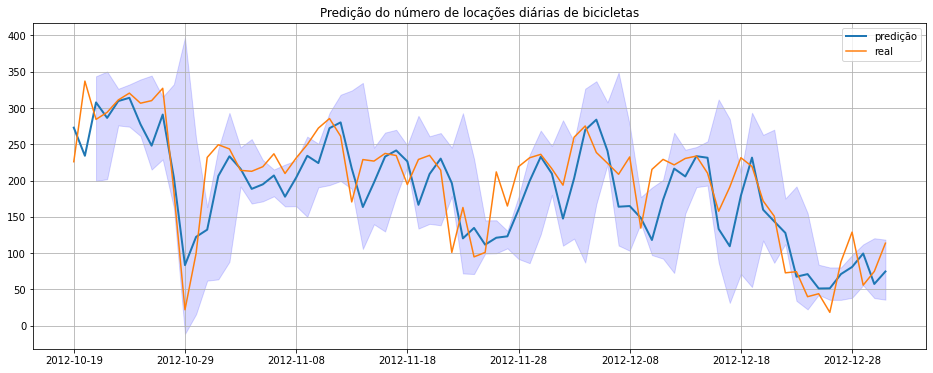

In [ ]:
# visualização
plt.plot(dtime_test, y_pred, linewidth=2, label='predição')
plt.fill_between(dtime_test, under_line, over_line, color='b', alpha=.15)
plt.plot(dtime_test, y_test, label='real')
plt.xticks(dtime_test.iloc[np.arange(dtime_test.size, step= 10).astype(int)])
plt.legend()
plt.grid()
plt.title("Predição do número de locações diárias de bicicletas")
plt.show()

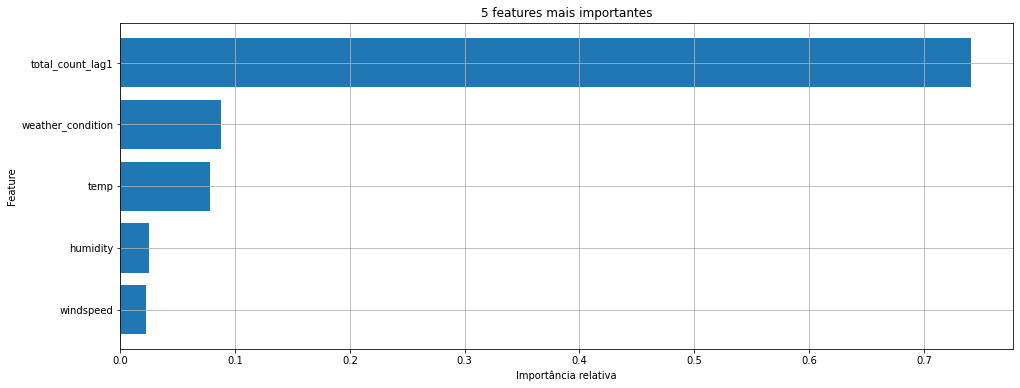

In [ ]:
# importâncias das features
fp = model.feature_importances_
n = 5
i = np.argsort(fp)[-n:]
cols = x_train.columns
plt.barh(cols[i], fp[i])
plt.grid()
plt.title(f"{n} features mais importantes")
plt.xlabel("Importância relativa")
plt.ylabel("Feature")
plt.show()

**Comentários**:

É importante ressaltar que diversas etapas importantes na modelagem de um problema de forecasting (séries temporais) não foram levadas em consideração aqui. Para quem quiser se aprodundar no tema, segue algumas referências:

- https://eng.uber.com/forecasting-introduction/
- https://eng.uber.com/m4-forecasting-competition/
- https://www.tensorflow.org/tutorials/structured_data/time_series
- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

**Referências:**
- https://seaborn.pydata.org/
- https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset